In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="MS Gothic",style="white")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import re
import collections


In [16]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1500)

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
sample = pd.read_csv('sample_submit.csv', header=None)

In [3]:
train["train"] = 1
train["test"] = 0
test["test"] = 0
test["test"] = 1

train = pd.concat([train,test])
train = train.reset_index(drop=True)

C:\Users\aaa-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
# バス・トイレ　データクリーニング
bath_df = train["バス・トイレ"].str.split("\t", expand=True)

bath_calums = ['専用バス', '専用バス／', '専用トイレ', '専用トイレ／','バス・トイレ別','バス・トイレ別／','シャワー','シャワー／','追焚機能', '追焚機能／', '浴室乾燥機', '浴室乾燥機／','温水洗浄便座','温水洗浄便座／','洗面台独立','洗面台独立／']

# カルムの数
count=len(bath_df.columns)

# bath_calumsの追加
for _, colname in enumerate(bath_calums):
    bath_df[colname]=0
        
    for k in range(count):
        bath_df.loc[bath_df[k]==colname, colname]=1 
        
# 必要なカルムのみ        
bath_df = bath_df[bath_calums].copy()

#train_bath[]=train_bath[]+train_bath[]
bath_df['専用バス']=bath_df['専用バス']+bath_df['専用バス／']
bath_df['専用トイレ']=bath_df['専用トイレ']+bath_df['専用トイレ／']
bath_df['バス・トイレ別']=bath_df['バス・トイレ別']+bath_df['バス・トイレ別／']
bath_df['シャワー']=bath_df['シャワー']+bath_df['シャワー／']
bath_df['追焚機能']=bath_df['追焚機能']+bath_df['追焚機能／']
bath_df['浴室乾燥機']=bath_df['浴室乾燥機']+bath_df['浴室乾燥機／']
bath_df['温水洗浄便座']=bath_df['温水洗浄便座']+bath_df['温水洗浄便座／']
bath_df['洗面台独立']=bath_df['洗面台独立']+bath_df['洗面台独立／']

bath_df = bath_df.drop(['専用バス／', '専用トイレ／', 'バス・トイレ別／', 'シャワー／', '追焚機能／', '浴室乾燥機／', '温水洗浄便座／','洗面台独立／'], axis=1)


In [5]:
#キッチン　データクリーニング
train_kitchen = train["キッチン"].str.split("\t", expand=True)

kitchen_calums =['ガスコンロ', 'ガスコンロ／', 'コンロ2口', 'コンロ2口／', 'コンロ3口', 'コンロ3口／', 'IHコンロ', 'IHコンロ／','給湯', '給湯／', 'カウンターキッチン', 'カウンターキッチン／', 'システムキッチン', 'システムキッチン／','独立キッチン', '独立キッチン／', 'L字キッチン', 'L字キッチン／']

# カルムの数
count=len(train_kitchen.columns)

# kitchen_calumsの追加
for _, colname in enumerate(kitchen_calums):
    train_kitchen[colname]=0
        
    for k in range(count):
        train_kitchen.loc[train_kitchen[k]==colname, colname]=1 
        
# 必要なカルムのみ        
train_kitchen = train_kitchen[kitchen_calums].copy()

#train_kitchen[]=train_kitchen[]+train_kitchen[]
train_kitchen['ガスコンロ']=train_kitchen['ガスコンロ']+train_kitchen['ガスコンロ／']
train_kitchen['コンロ2口']=train_kitchen['コンロ2口']+train_kitchen['コンロ2口／']
train_kitchen['コンロ3口']=train_kitchen['コンロ3口']+train_kitchen['コンロ3口／']
train_kitchen['IHコンロ']=train_kitchen['IHコンロ']+train_kitchen['IHコンロ／']
train_kitchen['給湯']=train_kitchen['給湯']+train_kitchen['給湯／']
train_kitchen['カウンターキッチン']=train_kitchen['カウンターキッチン']+train_kitchen['カウンターキッチン／']
train_kitchen['システムキッチン']=train_kitchen['システムキッチン']+train_kitchen['システムキッチン／']
train_kitchen['独立キッチン']=train_kitchen['独立キッチン']+train_kitchen['独立キッチン／']
train_kitchen['L字キッチン']=train_kitchen['L字キッチン']+train_kitchen['L字キッチン／']

train_kitchen = train_kitchen.drop(['ガスコンロ／', 'コンロ2口／','コンロ3口／', 'IHコンロ／', '給湯／', 'カウンターキッチン／', 'システムキッチン／','独立キッチン／', 'L字キッチン／'], axis=1)


In [6]:
#放送・通信　データクリーニング
train_net = train["放送・通信"].str.split("\t", expand=True)

net_calums =['インターネット対応', 'インターネット対応／', 'CATV', 'CATV／', 'CSアンテナ', 'CSアンテナ／', 'BSアンテナ', 'BSアンテナ／','光ファイバー', '光ファイバー／', '高速インターネット', '高速インターネット／', 'インターネット使用料無料', 'インターネット使用料無料／','有線放送', '有線放送／']

# カルムの数
count=len(train_net.columns)

# kitchen_calumsの追加
for _, colname in enumerate(net_calums):
    train_net[colname]=0
        
    for k in range(count):
        train_net.loc[train_net[k]==colname, colname]=1 
        
# 必要なカルムのみ        
train_net = train_net[net_calums].copy()

train_net['インターネット対応']=train_net['インターネット対応']+train_net['インターネット対応／']
train_net['CATV']=train_net['CATV']+train_net['CATV／']
train_net['CSアンテナ']=train_net['CSアンテナ']+train_net['CSアンテナ／']
train_net['BSアンテナ']=train_net['BSアンテナ']+train_net['BSアンテナ／']
train_net['光ファイバー']=train_net['光ファイバー']+train_net['光ファイバー／']
train_net['高速インターネット']=train_net['高速インターネット']+train_net['高速インターネット／']
train_net['インターネット使用料無料']=train_net['インターネット使用料無料']+train_net['インターネット使用料無料／']
train_net['有線放送']=train_net['有線放送']+train_net['有線放送／']

train_net = train_net.drop(['インターネット対応／', 'CATV／','CSアンテナ／', 'BSアンテナ／', '光ファイバー／', '高速インターネット／', 'インターネット使用料無料／','有線放送／'], axis=1)


In [7]:
train["定期借家"] = train["契約期間"].astype(str)
train["定期借家"] = train["定期借家"].apply(lambda x : 1 if "定期借家" in x else 0)

In [8]:
d_H = pd.get_dummies(train["方角"])

In [9]:
d_K = pd.get_dummies(train["建物構造"])

In [10]:
# 新築なら0をそれ以外なら、年数を数値型で返す関数
def change_age(x):
    #print(x)
    if x == '新築':
        return 0
    else:
        return int(x.split('年')[0])
 # 新築なら0それ以外ならすべてmonthに変換し数値型で返す関数              
def change_month(x):
     if x == '新築':
        return 0
     else:
         # 年とヶ月で分ける
        X = re.split('[年,ヶ月]', x)[0:2]
         # リストの中身を[int]に変換
        int_X = [int(n) for n in X]
         # すべてmonthに
         # reduce()リスト内の積の際使う
        month_X = reduce(lambda x, y: x *12 + y, int_X) 
        return month_X
         
train['築年数'] = train['築年数'].apply(lambda x : change_age(x))


In [11]:
A = []
for i in range(len(train)):
    try:
        a = re.split('[／\t,\t]',train["室内設備"][i])
        
        for s in range(len(a)):
            A.append(a[s])
    except TypeError:
        A.append(0)
        
counter = collections.Counter(A)

Air_con = []
syu = []
baruko = []
huro = []
sentakuokiba = []
sikitinaigomi = []
elevator = []
suidou = []
gesui = []
gas = []
tile = []
closet = []
two = []
ventilation_system = []
three = []
pairglass = []
garden = []
suidousonota = []
reibou = []
kussyon = []
yukadan = []
propane = []
loft = []
demado = []
trunk = []
kumitori = []
all_denka = []
roof_balcony = []
out_okiba = []
yukasita = []
barrier_free = []
zyousisou = []
bouon = []
nizyusassi = []
nisetai = []
gas_sonota = []
okiba_nasi = []
haisui_sonota = []
oil_dan = []
undergrand = []
gas_dan = []
ido = []
zero = []

columns_list = [Air_con, syu, baruko, huro, sentakuokiba, sikitinaigomi, elevator, suidou, gesui, gas, tile, closet,
                two, ventilation_system, three, pairglass, garden, zero, suidousonota, reibou, kussyon, yukadan, propane,
                loft, demado, trunk, kumitori, all_denka, roof_balcony, out_okiba, yukasita, barrier_free, zyousisou,
                bouon, nizyusassi, nisetai, gas_sonota, okiba_nasi, haisui_sonota, oil_dan, undergrand, gas_dan, ido]

choose_language = ["エアコン付", "シューズボックス", "バルコニー", "フローリング", "室内洗濯置き場", "敷地内ごみ置き場",
                  "エレベーター", "公営水道", "下水", "都市ガス", "タイル張り", "ウォークインクローゼット", "2面採光",
                   "24時間換気システム", "3面採光", "ペアガラス", "専用庭", "0", "水道その他", "冷房", "クッションフロア",
                   "床暖房", "プロパンガス", "ロフト付き", "出窓", "トランクルーム", "汲み取り", "オール電化", "ルーフバルコニー",
                   "室外洗濯置き場", "床下収納", "バリアフリー", "浄化槽", "防音室", "二重サッシ", "二世帯住宅", "ガスその他",
                   "洗濯置き場なし", "排水その他", "石油暖房", "地下室", "ガス暖房", "井戸"]

def Facility_make_data(x):
    for i in range(len(columns_list)):
        if choose_language[i] in x:
            columns_list[i].append(1)
        else:
            columns_list[i].append(0)

def Facility_zero_data(x):
    for i in range(len(columns_list)):
        columns_list[i].append(0)
        
for k in range(len(train)):
    try:
        x = re.split('[／\t,\t]',train["室内設備"][k])
        Facility_make_data(x)
    except TypeError:
        Facility_zero_data(x)

output_data = pd.DataFrame({"エアコン付":Air_con, "シューズボックス":syu, "バルコニー":baruko, "フローリング":huro,
                     "室内洗濯置き場":sentakuokiba, "敷地内ごみ置き場":sikitinaigomi, "エレベーター":elevator, "公営水道":suidou, 
                     "下水":gesui, "都市ガス":gas, "タイル張り":tile, "ウォークインクローゼット":closet,
                     "2面採光":two, "24時間換気システム":ventilation_system, "3面採光":three, "ペアガラス":pairglass,
                     "専用庭":garden, "0":zero, "水道その他":suidousonota, "冷房":reibou,
                     "クッションフロア":kussyon, "床暖房":yukadan, "プロパンガス":propane, "ロフト付き":loft,
                     "出窓":demado, "トランクルーム":trunk, "汲み取り":kumitori, "オール電化":all_denka,
                     "ルーフバルコニー":roof_balcony, "室外洗濯置き場":out_okiba, "床下収納":yukasita, "バリアフリー":barrier_free,
                     "浄化槽":zyousisou, "防音室":bouon, "二重サッシ":nizyusassi, "二世帯住宅":nisetai,
                     "ガスその他":gas_sonota, "洗濯置き場なし":okiba_nasi, "排水その他":haisui_sonota, "石油暖房":oil_dan,
                     "地下室":undergrand, "ガス暖房":gas_dan, "井戸":ido})



In [12]:
tokyo_slist = pd.read_csv("Tokyo_23.csv",header=None).values.tolist() #23区のCSVファイル

for c in tokyo_slist :
    train[str(c[0])] = train["所在地"].apply(lambda x : 1 if c[0] in x else 0)

In [13]:
train["面積"] = train["面積"].apply(lambda x : x[:-2])
train['面積'] = train['面積'].astype(np.float)

In [14]:
train["部屋数"] = train["間取り"].apply(lambda x : re.search(r'(\d)',x).group(0))
train['部屋数'] = train['部屋数'].astype(np.int)

train["L"] = train["間取り"].apply(lambda x : 1 if "L" in x else 0)
train["D"] = train["間取り"].apply(lambda x : 1 if "D" in x else 0)
train["K"] = train["間取り"].apply(lambda x : 1 if "K" in x else 0)
train["S"] = train["間取り"].apply(lambda x : 1 if "S" in x else 0)

In [15]:
train['所在階']=train['所在階'].str.replace('階建','')
train['所在階']=train['所在階'].str.replace('階','')
train_kai=train['所在階'].str.extract('(.+)／(.+)',expand=True)
train_kai[0]=train_kai[0].replace('地下','-',regex=True)
 
train_kai[0] = train_kai[0].fillna(0)  #階の欠損値は0に置換
train_kai[0]=train_kai[0].astype(int)
 
if train_kai[0].any() > 0:
    train_kai[1]=train_kai[1].str.replace('(地下1)','',regex=True)
    train_kai[1]=train_kai[1].str.replace('(地下2)','',regex=True)
    train_kai[1]=train_kai[1].str.replace('(地下3)','',regex=True)
    train_kai[1]=train_kai[1].str.replace('(地下4)','',regex=True)
    train_kai[1]=train_kai[1].str.replace('(地下5)','',regex=True)
    train_kai[1]=train_kai[1].str.replace('(地下6)','',regex=True)
    train_kai[1]=train_kai[1].str.replace('(地下7)','',regex=True)
    train_kai[1]=train_kai[1].str.replace('(地下8)','',regex=True)
     
train_kai[1]=train_kai[1].str.replace('（）','',regex=True)
     
train_kai[train_kai[1].str.contains('地下',na=False)] #しっかり置換されてるか確認
 
train['階']=train_kai[0]
train['階建']=train_kai[1]

In [17]:
train["階"].value_counts()

 2     16181
 1     12012
 3     10055
 4      6117
 5      3942
 6      2785
 7      2221
 8      1784
 9      1522
 0      1483
 10     1117
 11      844
 12      661
 13      430
 14      295
 15      157
 17      112
 16      110
 19      105
-1        79
 18       77
 20       73
 21       55
 25       52
 29       48
 24       40
 22       40
 23       33
 28       30
 32       26
 37       24
 26       23
 30       22
 38       19
 27       18
 33       13
-2        12
 34       12
 43       12
 42       12
 31       10
 39       10
 40        8
 35        6
 53        5
 36        4
-4         4
-3         4
 45        3
 41        3
 44        3
 49        3
-8         2
 47        2
 51        2
-9         2
 50        2
 52        1
-7         1
-6         1
-10        1
-5         1
-15        1
Name: 階, dtype: int64

In [16]:
trainX = pd.concat([train,bath_df, train_kitchen,train_net,d_H,d_K,output_data], axis=1)

In [40]:
train_x = trainX[trainX["train"]==1]
train_x = train_x.reset_index(drop=True)

In [41]:
test_x = trainX[trainX["test"]==1]
test_x = test_x.reset_index(drop=True)

In [25]:
train_y = train_x["賃料"]
train_x = train_x.drop(["id","train","test","賃料","所在地","アクセス","間取り","方角","所在階","バス・トイレ","キッチン","放送・通信","室内設備","駐車場","周辺環境","建物構造","契約期間","階建"], axis=1)
test_x = test_x.drop(["id","train","test","賃料","所在地","アクセス","間取り","方角","所在階","バス・トイレ","キッチン","放送・通信","室内設備","駐車場","周辺環境","建物構造","契約期間","階建"], axis=1)

In [27]:
train_x

,築年数,面積,定期借家,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,大田区,世田谷区,渋谷区,中野区,杉並区,豊島区,北区,荒川区,板橋区,練馬区,足立区,葛飾区,江戸川区,部屋数,L,D,K,S,階,専用バス,専用トイレ,バス・トイレ別,シャワー,追焚機能,浴室乾燥機,温水洗浄便座,洗面台独立,ガスコンロ,コンロ2口,コンロ3口,IHコンロ,給湯,カウンターキッチン,システムキッチン,独立キッチン,L字キッチン,インターネット対応,CATV,CSアンテナ,BSアンテナ,光ファイバー,高速インターネット,インターネット使用料無料,有線放送,北,北東,北西,南,南東,南西,東,西,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄筋ブロック,鉄骨造,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,タイル張り,ウォークインクローゼット,2面採光,24時間換気システム,3面採光,ペアガラス,専用庭,0,水道その他,冷房,クッションフロア,床暖房,プロパンガス,ロフト付き,出窓,トランクルーム,汲み取り,オール電化,ルーフバルコニー,室外洗濯置き場,床下収納,バリアフリー,浄化槽,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
0,9,20.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44,16.50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,22.05,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,12,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,29,60.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,1,1,0,3,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,31,39.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31465,30,37.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31466,39,12.04,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31467,45,60.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,1,0,3,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31468,11,29.59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
clf = RandomForestRegressor(n_estimators=500)

In [29]:
clf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [30]:
clf.score(train_x,train_y)

0.9868796414100707

In [31]:
y_pred = clf.predict(test_x)
sample[1] = y_pred
sample.to_csv("submit101.csv",header=None, index = None)

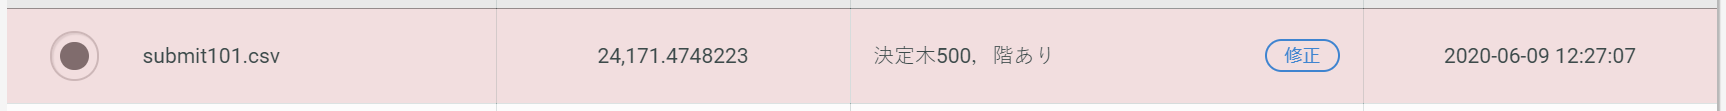

外れ値の観察

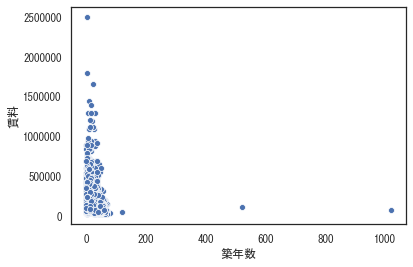

In [38]:
sns.scatterplot(x="築年数",y="賃料",data=train_x)

In [43]:
train_x[train_x["築年数"]>100]

,id,test,train,アクセス,キッチン,バス・トイレ,周辺環境,契約期間,室内設備,建物構造,所在地,所在階,放送・通信,方角,築年数,賃料,間取り,面積,駐車場,定期借家,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,大田区,世田谷区,渋谷区,中野区,杉並区,豊島区,北区,荒川区,板橋区,練馬区,足立区,葛飾区,江戸川区,部屋数,L,D,K,S,階,階建,専用バス,専用トイレ,バス・トイレ別,シャワー,追焚機能,浴室乾燥機,温水洗浄便座,洗面台独立,ガスコンロ,コンロ2口,コンロ3口,IHコンロ,給湯,カウンターキッチン,システムキッチン,独立キッチン,L字キッチン,インターネット対応,CATV,CSアンテナ,BSアンテナ,光ファイバー,高速インターネット,インターネット使用料無料,有線放送,北,北東,北西,南,南東,南西,東,西,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄筋ブロック,鉄骨造,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,タイル張り,ウォークインクローゼット,2面採光,24時間換気システム,3面採光,ペアガラス,専用庭,0,水道その他,冷房,クッションフロア,床暖房,プロパンガス,ロフト付き,出窓,トランクルーム,汲み取り,オール電化,ルーフバルコニー,室外洗濯置き場,床下収納,バリアフリー,浄化槽,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
20231,20232,0,1.0,都営三田線\t西台駅\t徒歩7分\t\t都営三田線\t蓮根駅\t徒歩7分,コンロ設置可（コンロ3口）／\t給湯,専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,NaN,NaN,エアコン付\t出窓／\tバルコニー／\tフローリング／\t室内洗濯機置場／\tタイル張り,鉄骨造,東京都板橋区蓮根３丁目,3／3,光ファイバー／\tCATV,南,520,112000.0,2DK+S(納戸),51.30,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,1,1,3,3,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20427,20428,0,1.0,東急東横線\t祐天寺駅\t徒歩11分\t\t東急東横線\t中目黒駅\t徒歩15分\t\t東急...,コンロ設置可（コンロ2口）,専用トイレ／\tバス・トイレ別／\tシャワー,NaN,NaN,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタ...,鉄骨造,東京都目黒区中町２丁目,2／2,インターネット対応,南,1019,82000.0,1DK,24.00,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,2,2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22247,22248,0,1.0,小田急小田原線\t祖師ケ谷大蔵駅\t徒歩10分\t\t小田急小田原線\t成城学園前駅\t徒歩15分,コンロ設置可（コンロ2口）,専用トイレ,NaN,NaN,エアコン付\t公営水道,木造,東京都世田谷区砧７丁目,1／2,NaN,NaN,119,52000.0,1K,18.15,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
test_x[test_x["築年数"]>100]

,id,test,train,アクセス,キッチン,バス・トイレ,周辺環境,契約期間,室内設備,建物構造,所在地,所在階,放送・通信,方角,築年数,賃料,間取り,面積,駐車場,定期借家,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,大田区,世田谷区,渋谷区,中野区,杉並区,豊島区,北区,荒川区,板橋区,練馬区,足立区,葛飾区,江戸川区,部屋数,L,D,K,S,階,階建,専用バス,専用トイレ,バス・トイレ別,シャワー,追焚機能,浴室乾燥機,温水洗浄便座,洗面台独立,ガスコンロ,コンロ2口,コンロ3口,IHコンロ,給湯,カウンターキッチン,システムキッチン,独立キッチン,L字キッチン,インターネット対応,CATV,CSアンテナ,BSアンテナ,光ファイバー,高速インターネット,インターネット使用料無料,有線放送,北,北東,北西,南,南東,南西,東,西,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄筋ブロック,鉄骨造,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,タイル張り,ウォークインクローゼット,2面採光,24時間換気システム,3面採光,ペアガラス,専用庭,0,水道その他,冷房,クッションフロア,床暖房,プロパンガス,ロフト付き,出窓,トランクルーム,汲み取り,オール電化,ルーフバルコニー,室外洗濯置き場,床下収納,バリアフリー,浄化槽,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
9917,41388,1,NaN,南北線\t西ケ原駅\t徒歩6分\t\t都電荒川線\t滝野川一丁目駅\t徒歩7分\t\t都電荒...,給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー,NaN,NaN,エアコン付,木造,東京都北区西ケ原３丁目,3／3,NaN,NaN,111,NaN,1DK,29.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,3,3,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


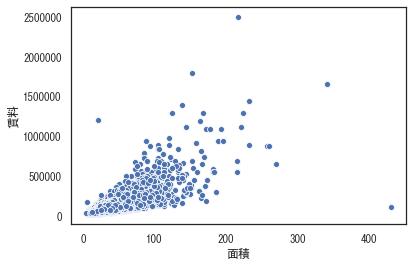

In [45]:
sns.scatterplot(x="面積",y="賃料",data=train_x)

In [46]:
train_x[train_x["面積"]>300]

,id,test,train,アクセス,キッチン,バス・トイレ,周辺環境,契約期間,室内設備,建物構造,所在地,所在階,放送・通信,方角,築年数,賃料,間取り,面積,駐車場,定期借家,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,大田区,世田谷区,渋谷区,中野区,杉並区,豊島区,北区,荒川区,板橋区,練馬区,足立区,葛飾区,江戸川区,部屋数,L,D,K,S,階,階建,専用バス,専用トイレ,バス・トイレ別,シャワー,追焚機能,浴室乾燥機,温水洗浄便座,洗面台独立,ガスコンロ,コンロ2口,コンロ3口,IHコンロ,給湯,カウンターキッチン,システムキッチン,独立キッチン,L字キッチン,インターネット対応,CATV,CSアンテナ,BSアンテナ,光ファイバー,高速インターネット,インターネット使用料無料,有線放送,北,北東,北西,南,南東,南西,東,西,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄筋ブロック,鉄骨造,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,タイル張り,ウォークインクローゼット,2面採光,24時間換気システム,3面採光,ペアガラス,専用庭,0,水道その他,冷房,クッションフロア,床暖房,プロパンガス,ロフト付き,出窓,トランクルーム,汲み取り,オール電化,ルーフバルコニー,室外洗濯置き場,床下収納,バリアフリー,浄化槽,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
20926,20927,0,1.0,日比谷線\t南千住駅\t徒歩7分\t\t京成本線\t千住大橋駅\t徒歩10分\t\t都電荒川...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t独立キッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立...,【スーパー】 432m\t【スーパー】 532m\t【コンビニ】 111m\t【コンビニ】 ...,NaN,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,鉄骨造,東京都荒川区南千住７丁目,2／10,インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,西,19,116000.0,2LDK,430.1,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,1,1,0,2,10,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30539,30540,0,1.0,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t恵比寿駅\t徒歩6分,給湯／\t冷蔵庫あり,温水洗浄便座,NaN,3年間\t※この物件は\t定期借家\tです。,トランクルーム\tエレベーター,RC（鉄筋コンクリート）,東京都渋谷区広尾１丁目,12／13（地下2）,CATV,南,22,1660000.0,4LDK+S(納戸),341.3,駐車場\t無,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,1,1,1,1,12,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
test_x[test_x["面積"]>300]

,id,test,train,アクセス,キッチン,バス・トイレ,周辺環境,契約期間,室内設備,建物構造,所在地,所在階,放送・通信,方角,築年数,賃料,間取り,面積,駐車場,定期借家,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,大田区,世田谷区,渋谷区,中野区,杉並区,豊島区,北区,荒川区,板橋区,練馬区,足立区,葛飾区,江戸川区,部屋数,L,D,K,S,階,階建,専用バス,専用トイレ,バス・トイレ別,シャワー,追焚機能,浴室乾燥機,温水洗浄便座,洗面台独立,ガスコンロ,コンロ2口,コンロ3口,IHコンロ,給湯,カウンターキッチン,システムキッチン,独立キッチン,L字キッチン,インターネット対応,CATV,CSアンテナ,BSアンテナ,光ファイバー,高速インターネット,インターネット使用料無料,有線放送,北,北東,北西,南,南東,南西,東,西,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄筋ブロック,鉄骨造,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,タイル張り,ウォークインクローゼット,2面採光,24時間換気システム,3面採光,ペアガラス,専用庭,0,水道その他,冷房,クッションフロア,床暖房,プロパンガス,ロフト付き,出窓,トランクルーム,汲み取り,オール電化,ルーフバルコニー,室外洗濯置き場,床下収納,バリアフリー,浄化槽,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
7793,39264,1,NaN,東急東横線\t田園調布駅\t徒歩4分\t\t東急目黒線\t田園調布駅\t徒歩4分,IHコンロ\t／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,NaN,5年間\t※この物件は\t定期借家\tです。,エアコン付／\t床暖房\tウォークインクローゼット\tバルコニー／\tフローリング／\t室内...,木造,東京都大田区田園調布３丁目,2（地下1）,CATV,南,13,NaN,6LDK+S(納戸),407.61,駐車場\t空有,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,1,1,1,1,0,NaN,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24309,55780,1,NaN,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t広尾駅\t徒歩13分\t\t東急東横線\t...,ガスコンロ／\tコンロ4口以上／\tシステムキッチン\t／\t給湯／\t独立キッチン,専用バス／\t専用トイレ／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立...,【スーパー】 729m\t【コンビニ】 177m\t【スーパー】 363m\t【病院】 727m,3年間\t※この物件は\t定期借家\tです。,エアコン付\tトランクルーム\t／\tウォークインクローゼット\tシューズボックス／\tバル...,RC（鉄筋コンクリート）,東京都渋谷区広尾１丁目1-7,12／13,インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,南,22,NaN,4LDK+S(納戸),341.30,"駐輪場\t空有\t駐車場\t近隣\t60,000円(税込)\t距離200m\tバイク置き場\t無",1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,1,1,1,1,12,13,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30163,61634,1,NaN,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t広尾駅\t徒歩15分\t\t東急東横線\t...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄...,NaN,3年間\t※この物件は\t定期借家\tです。,エアコン付\tトランクルーム\tシューズボックス／\tバルコニー／\tフローリング／\t24...,RC（鉄筋コンクリート）,東京都渋谷区広尾１丁目,12／13,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,東,22,NaN,4LDK+S(納戸),341.30,駐車場\t近隣\t距離279m,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,1,1,1,1,12,13,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
train_x[(train_x["面積"]<100) & (train_x["賃料"]>1000000)]

,id,test,train,アクセス,キッチン,バス・トイレ,周辺環境,契約期間,室内設備,建物構造,所在地,所在階,放送・通信,方角,築年数,賃料,間取り,面積,駐車場,定期借家,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,大田区,世田谷区,渋谷区,中野区,杉並区,豊島区,北区,荒川区,板橋区,練馬区,足立区,葛飾区,江戸川区,部屋数,L,D,K,S,階,階建,専用バス,専用トイレ,バス・トイレ別,シャワー,追焚機能,浴室乾燥機,温水洗浄便座,洗面台独立,ガスコンロ,コンロ2口,コンロ3口,IHコンロ,給湯,カウンターキッチン,システムキッチン,独立キッチン,L字キッチン,インターネット対応,CATV,CSアンテナ,BSアンテナ,光ファイバー,高速インターネット,インターネット使用料無料,有線放送,北,北東,北西,南,南東,南西,東,西,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄筋ブロック,鉄骨造,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,タイル張り,ウォークインクローゼット,2面採光,24時間換気システム,3面採光,ペアガラス,専用庭,0,水道その他,冷房,クッションフロア,床暖房,プロパンガス,ロフト付き,出窓,トランクルーム,汲み取り,オール電化,ルーフバルコニー,室外洗濯置き場,床下収納,バリアフリー,浄化槽,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
5775,5776,0,1.0,山手線\t新橋駅\t徒歩2分\t\t都営大江戸線\t汐留駅\t徒歩2分,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,【スーパー】 432m\t【スーパー】 570m\t【コンビニ】 43m\t【コンビニ】 2...,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,RC（鉄筋コンクリート）,東京都港区新橋４丁目,10／15,インターネット対応／\t光ファイバー／\tCATV／\tインターネット使用料無料,北西,12,1203500.0,1K,20.53,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,10,15,1,1,1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
train_x.drop(train_x[train_x["築年数"]>120].index)
train_x.drop(train_x[train_x["面積"]>400].index)
train_x.drop(train_x[(train_x["面積"]<100) & (train_x["賃料"]>1000000)].index)

,id,test,train,アクセス,キッチン,バス・トイレ,周辺環境,契約期間,室内設備,建物構造,所在地,所在階,放送・通信,方角,築年数,賃料,間取り,面積,駐車場,定期借家,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,大田区,世田谷区,渋谷区,中野区,杉並区,豊島区,北区,荒川区,板橋区,練馬区,足立区,葛飾区,江戸川区,部屋数,L,D,K,S,階,階建,専用バス,専用トイレ,バス・トイレ別,シャワー,追焚機能,浴室乾燥機,温水洗浄便座,洗面台独立,ガスコンロ,コンロ2口,コンロ3口,IHコンロ,給湯,カウンターキッチン,システムキッチン,独立キッチン,L字キッチン,インターネット対応,CATV,CSアンテナ,BSアンテナ,光ファイバー,高速インターネット,インターネット使用料無料,有線放送,北,北東,北西,南,南東,南西,東,西,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄筋ブロック,鉄骨造,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,タイル張り,ウォークインクローゼット,2面採光,24時間換気システム,3面採光,ペアガラス,専用庭,0,水道その他,冷房,クッションフロア,床暖房,プロパンガス,ロフト付き,出窓,トランクルーム,汲み取り,オール電化,ルーフバルコニー,室外洗濯置き場,床下収納,バリアフリー,浄化槽,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
0,1,0,1.0,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,RC（鉄筋コンクリート）,東京都北区滝野川３丁目,1／12,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,南東,9,75000.0,1K,20.01,駐輪場\t空有,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,12,1,1,1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1.0,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,ガスコンロ／\tシステムキッチン\t／\t給湯,専用トイレ／\tシャワー／\t温水洗浄便座,【スーパー】 1283m,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,鉄骨造,東京都中央区月島３丁目,5／10,インターネット対応,NaN,44,76000.0,1R,16.50,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,10,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,1.0,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,2年間,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,RC（鉄筋コンクリート）,東京都渋谷区笹塚２丁目,12／15,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,南,8,110000.0,1K,22.05,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,12,15,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,1.0,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,ガスコンロ／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,2年間\t※この物件は\t定期借家\tです。,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,RC（鉄筋コンクリート）,東京都杉並区高円寺南２丁目23-2,3／4,インターネット対応／\t光ファイバー,南,29,150000.0,2LDK,60.48,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,1,1,0,3,4,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1.0,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,給湯／\t独立キッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,2年間,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,木造,東京都葛飾区金町３丁目7-2,1／2,NaN,南,31,74000.0,2DK,39.66,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,2,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [60]:
train_x

,id,test,train,アクセス,キッチン,バス・トイレ,周辺環境,契約期間,室内設備,建物構造,所在地,所在階,放送・通信,方角,築年数,賃料,間取り,面積,駐車場,定期借家,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,大田区,世田谷区,渋谷区,中野区,杉並区,豊島区,北区,荒川区,板橋区,練馬区,足立区,葛飾区,江戸川区,部屋数,L,D,K,S,階,階建,専用バス,専用トイレ,バス・トイレ別,シャワー,追焚機能,浴室乾燥機,温水洗浄便座,洗面台独立,ガスコンロ,コンロ2口,コンロ3口,IHコンロ,給湯,カウンターキッチン,システムキッチン,独立キッチン,L字キッチン,インターネット対応,CATV,CSアンテナ,BSアンテナ,光ファイバー,高速インターネット,インターネット使用料無料,有線放送,北,北東,北西,南,南東,南西,東,西,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄筋ブロック,鉄骨造,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,タイル張り,ウォークインクローゼット,2面採光,24時間換気システム,3面採光,ペアガラス,専用庭,0,水道その他,冷房,クッションフロア,床暖房,プロパンガス,ロフト付き,出窓,トランクルーム,汲み取り,オール電化,ルーフバルコニー,室外洗濯置き場,床下収納,バリアフリー,浄化槽,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
0,1,0,1.0,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,RC（鉄筋コンクリート）,東京都北区滝野川３丁目,1／12,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,南東,9,75000.0,1K,20.01,駐輪場\t空有,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,12,1,1,1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1.0,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,ガスコンロ／\tシステムキッチン\t／\t給湯,専用トイレ／\tシャワー／\t温水洗浄便座,【スーパー】 1283m,2年間,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,鉄骨造,東京都中央区月島３丁目,5／10,インターネット対応,NaN,44,76000.0,1R,16.50,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,10,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,1.0,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,2年間,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,RC（鉄筋コンクリート）,東京都渋谷区笹塚２丁目,12／15,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,南,8,110000.0,1K,22.05,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,12,15,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,1.0,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,ガスコンロ／\t給湯,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,2年間\t※この物件は\t定期借家\tです。,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,RC（鉄筋コンクリート）,東京都杉並区高円寺南２丁目23-2,3／4,インターネット対応／\t光ファイバー,南,29,150000.0,2LDK,60.48,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,1,1,0,3,4,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1.0,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,給湯／\t独立キッチン,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,2年間,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,木造,東京都葛飾区金町３丁目7-2,1／2,NaN,南,31,74000.0,2DK,39.66,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,2,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.